# ACTIVIDAD 2: REDES NEURONALES CONVOLUCIONALES

---

En esta actividad, vamos a trabajar con Convolutional Neural Networks para resolver un problema de clasificación de imágenes. En particular, vamos a clasificar diez clases que incluyen fundamentalmente animales y vehículos.

Como las CNN profundas son un tipo de modelo bastante avanzado y computacionalmente costoso, se recomienda hacer la práctica en Google Colaboratory con soporte para GPUs. En [este enlace](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) se explica cómo activar un entorno con GPUs. *Nota: para leer las imágenes y estandarizarlas al mismo tamaño se usa la librería opencv. Esta ĺibrería está ya instalada en el entorno de Colab, pero si trabajáis de manera local tendréis que instalarla.*

<center><img src="https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png" style="text-align: center" height="300px"></center>

El dataset a utilizar consiste en 60000 imágenes a color de 10 clases de animales y vehículos. El dataset en cuestión se denomina [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) y es más complejo que el dataset MNIST que hemos utilizado en la actividad 1. Aunque tiene las mismas clases (10), los animales y vehículos pueden aparecer en distintas poses, en distintas posiciones de la imagen o con otros animales/ vehículos en pantalla (si bien el elemento a clasificar siempre aparece en la posición predominante).

## Carga de los datos

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd
import keras.datasets.cifar10 as cifar10

from tensorflow import keras
from keras.utils import to_categorical

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2025-06-06 12:18:05.445495: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Primero, definimos los datos de entrenamiento, validación y prueba
(X, Y), (x_test, y_test) = cifar10.load_data()
(x_train, x_valid) = (X[:40000], X[40000:])
(y_train, y_valid) = (Y[:40000], Y[40000:])

In [3]:
# Normalizamos como de costumbre
x_train = x_train / 255.
x_valid = x_valid / 255.
x_test = x_test / 255.

In [4]:
# Esta variable contiene un mapeo de número de clase a elemento (animal o vehículo).
# La incluimos para ayudarte con la identificación de clases. De ti depende
# si quieres utilizar esta variable o no
MAP_ELEMENTS = {
    0: 'avion', 1: 'coche', 2: 'ave',
    3: 'gato', 4: 'ciervo', 5: 'perro', 6: 'rana',
    7: 'caballo', 8: 'barco', 9: 'camion'
}

In [5]:
# Función auxiliar para convertir las etiquetas a codificación one-hot
def convert_to_one_hot(labels, num_classes):
    return np.squeeze(np.array([to_categorical(label, num_classes=num_classes) for label in labels]))

# Convertimos las etiquetas de entrenamiento, validación y prueba
num_classes = 10
y_train_one_hot = convert_to_one_hot(y_train, num_classes)
y_valid_one_hot = convert_to_one_hot(y_valid, num_classes)
y_test_one_hot = convert_to_one_hot(y_test, num_classes)

# Verificamos las conversiones
print(y_train_one_hot.shape)
print(y_valid_one_hot.shape)
print(y_test_one_hot.shape)

(40000, 10)
(10000, 10)
(10000, 10)


## Ejercicio

Utilizando Convolutional Neural Networks con Keras, entrenar un clasificador que sea capaz de reconocer una imagen de las incluidas en CIFAR-10 con la mayor accuracy posible. Redactar un informe analizando varias de las alternativas probadas y los resultados obtenidos.

A continuación se detallan una serie de aspectos orientativos que podrían ser analizados en vuestro informe (no es necesario tratar todos ellos ni mucho menos, esto son ideas orientativas de aspectos que podéis explorar):

*   Análisis de los datos a utilizar.
*   Análisis de resultados, obtención de métricas de *precision* y *recall* por clase y análisis de qué clases obtienen mejores o peores resultados.
*   Análisis visual de los errores de la red. ¿Qué tipo de imágenes dan más problemas a nuestro modelo?
*   Comparación de modelos CNNs con un modelo de Fully Connected para este problema.
*   Utilización de distintas arquitecturas CNNs, comentando aspectos como su profundidad, hiperparámetros utilizados, optimizador, uso de técnicas de regularización, *batch normalization*, etc.
*   [ *algo más difícil* ] Utilización de *data augmentation*. Esto puede conseguirse con la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) de Keras.

Notas:
* Te recomendamos mantener los conjuntos de entrenamiento, test y prueba que se crean en el Notebook. No obstante, si crees que modificando tales conjuntos puedes lograr mejores resultados (o que puedes lograr los mismos resultados con menos datos, lo cual es también un logro), eres libre de hacerlo.
* No es necesario mostrar en el notebook las trazas de entrenamiento de todos los modelos entrenados, si bien una buena idea seria guardar gráficas de esos entrenamientos para el análisis. Sin embargo, **se debe mostrar el entrenamiento completo del mejor modelo obtenido y la evaluación de los datos de test con este modelo**.

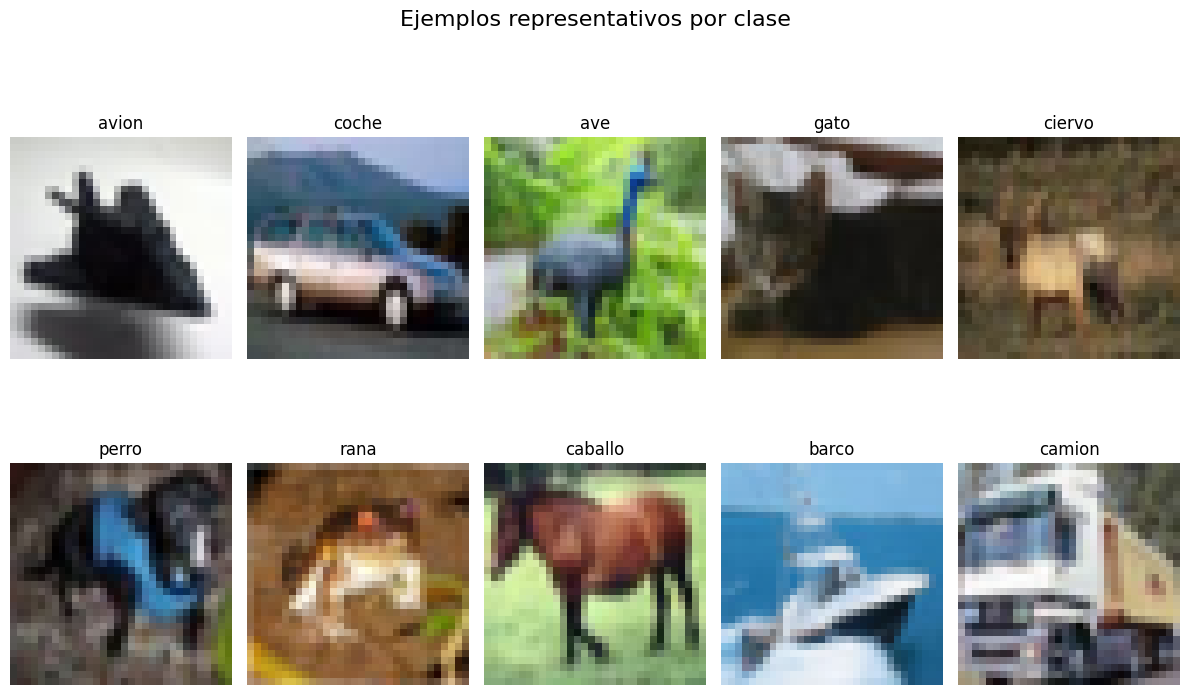

In [6]:
# Visualización de ejemplos de las clases
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i in range(10):
    idx = np.where(y_train == i)[0][0]
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[idx])
    plt.title(MAP_ELEMENTS[i])
    plt.axis('off')
plt.suptitle("Ejemplos representativos por clase", fontsize=16)
plt.tight_layout()
plt.show()

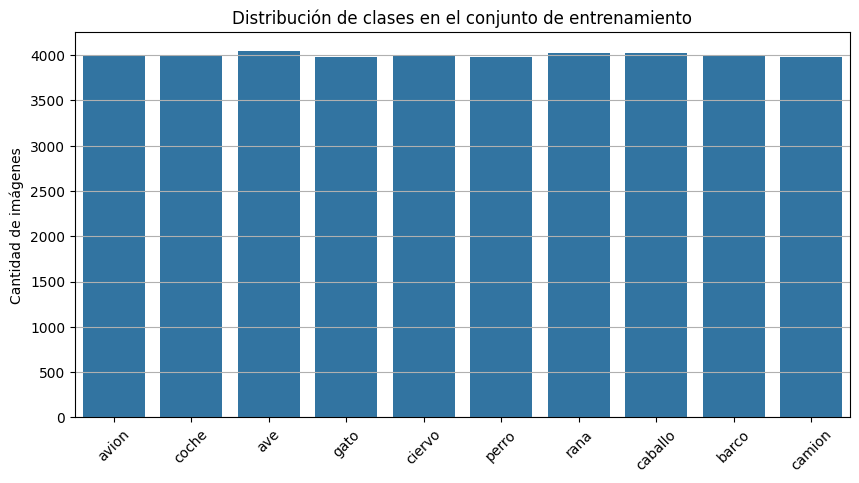

In [7]:
import seaborn as sns
unique, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(10, 5))
sns.barplot(x=[MAP_ELEMENTS[i] for i in unique], y=counts)
plt.title("Distribución de clases en el conjunto de entrenamiento")
plt.ylabel("Cantidad de imágenes")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

fc_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

fc_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fc_model.summary()


ModuleNotFoundError: No module named 'tensorflow.keras'

In [ ]:
history_fc = fc_model.fit(
    x_train, y_train_one_hot,
    epochs=10,
    batch_size=64,
    validation_data=(x_valid, y_valid_one_hot)
)


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2,2)),
    BatchNormalization(),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()


In [ ]:
history_cnn = cnn_model.fit(
    x_train, y_train_one_hot,
    epochs=15,
    batch_size=64,
    validation_data=(x_valid, y_valid_one_hot)
)


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred_cnn = cnn_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_cnn, axis=1)
y_true = y_test.flatten()

report = classification_report(y_true, y_pred_classes, target_names=list(MAP_ELEMENTS.values()))
print(report)


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(MAP_ELEMENTS.values()),
            yticklabels=list(MAP_ELEMENTS.values()))
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión - Modelo CNN")
plt.show()


In [ ]:
# Visualizar primeras imágenes mal clasificadas
incorrect = np.where(y_pred_classes != y_true)[0]
plt.figure(figsize=(15, 10))
for i, idx in enumerate(incorrect[:15]):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f"Real: {MAP_ELEMENTS[y_true[idx]]}\nPred: {MAP_ELEMENTS[y_pred_classes[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_fc.history['val_accuracy'], label='Fully Connected')
plt.plot(history_cnn.history['val_accuracy'], label='CNN')
plt.title("Comparación de precisión en validación")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()
plt.grid()
plt.show()


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

final_model = tf.keras.models.clone_model(cnn_model)
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_aug = final_model.fit(
    datagen.flow(x_train, y_train_one_hot, batch_size=64),
    validation_data=(x_valid, y_valid_one_hot),
    epochs=15
)


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_aug.history['val_accuracy'], label='CNN + Augmentation')
plt.plot(history_cnn.history['val_accuracy'], label='CNN base')
plt.title("Validación: CNN base vs CNN con Data Augmentation")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()
plt.grid()
plt.show()
